In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import sigpy.mri.rf as rf
import numpy as np
import util
import islr_cvxpy

import cvxpy as cp
import scipy.sparse

# Excitation

In [2]:
n = 16
tb = 4
d1 = 0.01
d2 = 0.01

dinf = rf.dinf(d1, d2)
w = dinf / tb
bands = [[-np.pi, - (1 + w) * tb / n * np.pi],
        [-(1 - w) * tb / n * np.pi, (1 - w) * tb / n * np.pi],
        [(1 + w) * tb / n * np.pi, np.pi]]

m_xy = [0, lambda omega: np.exp(-1j * omega * n / 2), 0]
m_z = [1, 0, 1]

d_xy = [d2, d1, d2]
d_z = [1 - (1 - d2**2)**0.5, (1 - (1 - d1)**2)**0.5, 1 - (1 - d2**2)**0.5]

a, b = islr_cvxpy.design_paulynomials(n, bands, m_xy, d_xy, m_z, d_z, verbose=True)
b1 = rf.ab2rf(a[::-1], b[::-1])



Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 6220            
  Cones                  : 450             
  Scalar variables       : 3978            
  Matrix variables       : 1               
  Integer variables      : 0               

Optimizer started.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 6220            
  Cones                  : 450             
  Scalar variables       : 3978            
  Matrix variables       : 1               
  Integer variables      : 0               

Optimizer  - threads                : 32              
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 5314
Optimizer  - Cones                  : 451
Optimizer  - Scalar variab

<IPython.core.display.Javascript object>


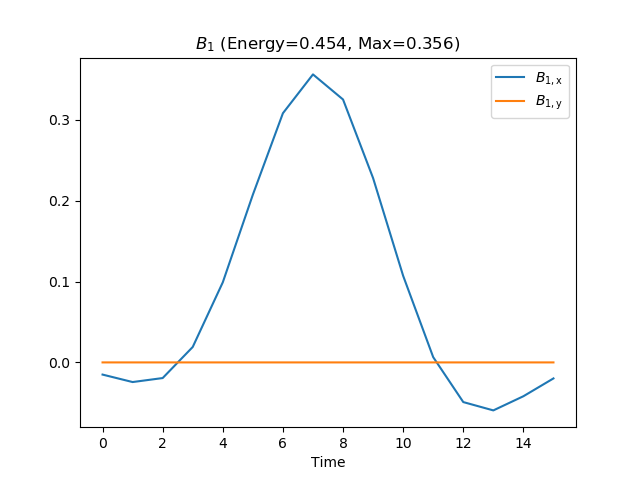

<IPython.core.display.Javascript object>


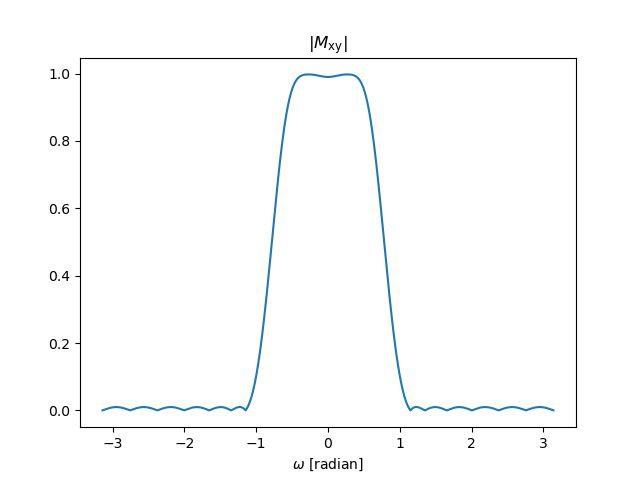

<IPython.core.display.Javascript object>


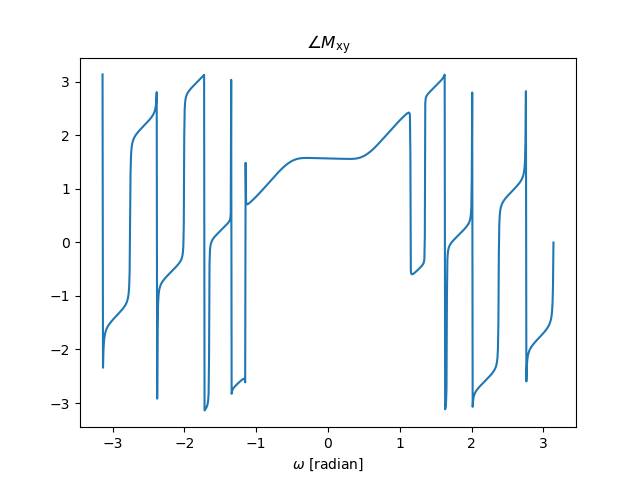

<IPython.core.display.Javascript object>


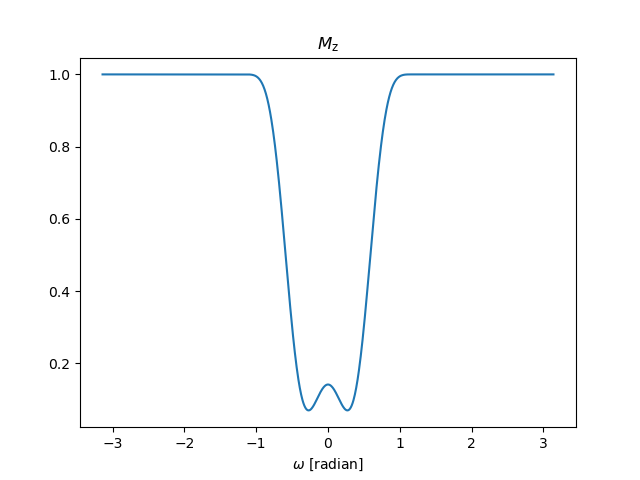

In [3]:
figs = util.plot_rf(b1, linphase=(n + 1) / 2)

# Inversion

In [4]:
n = 16
tb = 4
d1 = 0.01
d2 = 0.01
lamda = 1

dinf = rf.dinf(d1, d2)
w = dinf / tb
bands = [[-np.pi, - (1 + w) * tb / n * np.pi],
        [-(1 - w) * tb / n * np.pi, (1 - w) * tb / n * np.pi],
        [(1 + w) * tb / n * np.pi, np.pi]]

m_xy = [0, 0, 0]
m_z = [1, -1, 1]

d1_xy = (1 - (1 - d1)**2)**0.5 
d2_xy = (1 - (1 - d2)**2)**0.5 
d_xy = [d2_xy, d1_xy, d2_xy]
d_z = [d2, d1, d2]

a, b = islr_cvxpy.design_paulynomials(n, bands, m_xy, d_xy, m_z, d_z, lamda=lamda, verbose=True)
b1 = rf.ab2rf(a[::-1], b[::-1])



Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 6220            
  Cones                  : 450             
  Scalar variables       : 3978            
  Matrix variables       : 1               
  Integer variables      : 0               

Optimizer started.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 6220            
  Cones                  : 450             
  Scalar variables       : 3978            
  Matrix variables       : 1               
  Integer variables      : 0               

Optimizer  - threads                : 32              
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 5314
Optimizer  - Cones                  : 451
Optimizer  - Scalar variab

<IPython.core.display.Javascript object>


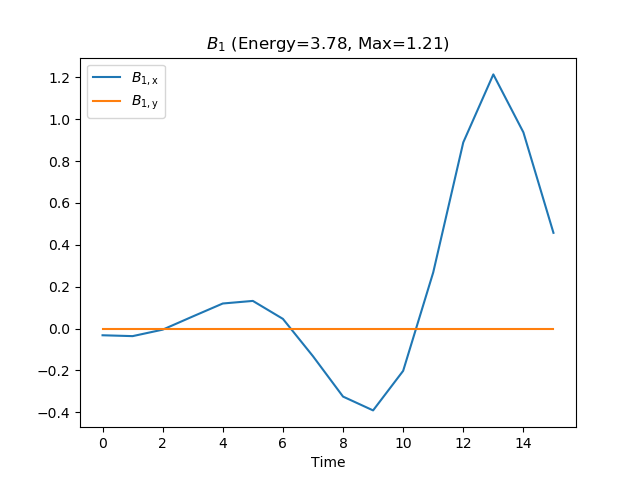

<IPython.core.display.Javascript object>


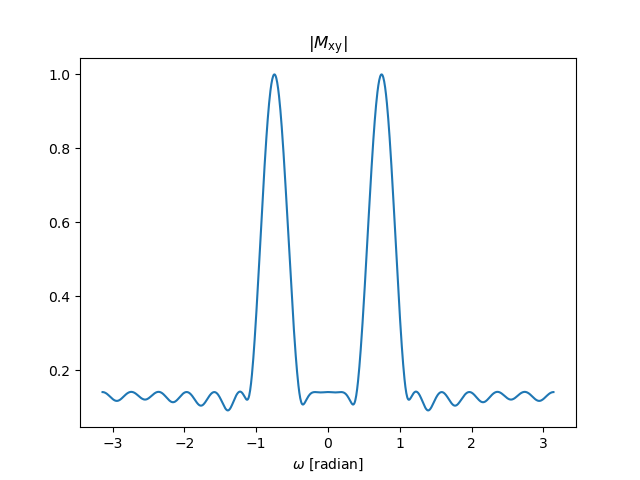

<IPython.core.display.Javascript object>


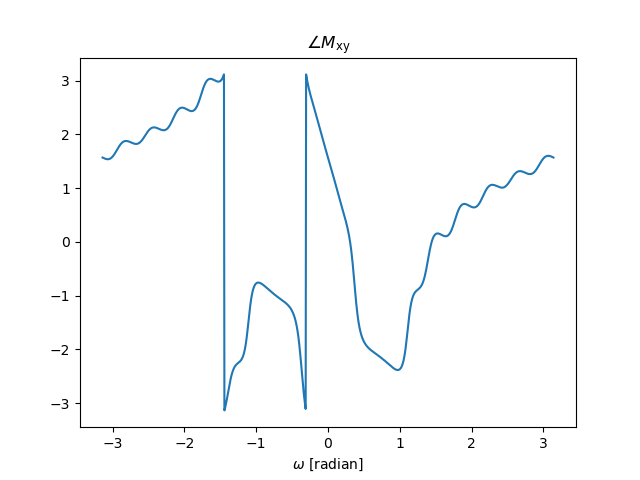

<IPython.core.display.Javascript object>


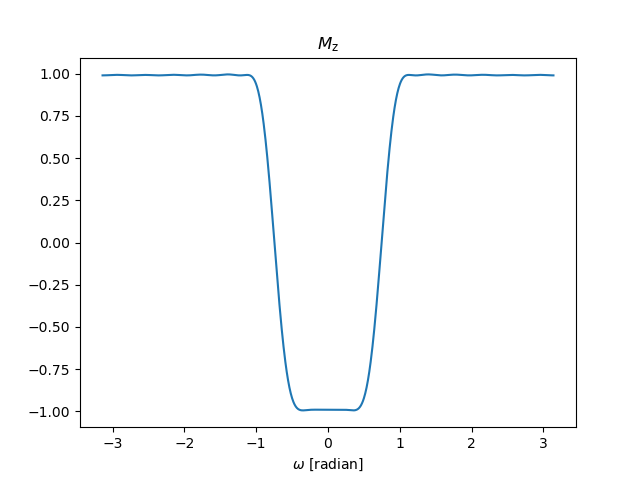

In [5]:
figs = util.plot_rf(b1)

# Excitation minphase

In [6]:
n = 16
tb = 4
d1 = 0.01
d2 = 0.01
lamda = 1

dinf = rf.dinf(d1, d2)
w = dinf / tb
bands = [[-np.pi, - (1 + w) * tb / n * np.pi],
        [-(1 - w) * tb / n * np.pi, (1 - w) * tb / n * np.pi],
        [(1 + w) * tb / n * np.pi, np.pi]]

m_xy = [0, 0, 0]
m_z = [1, 0, 1]

d1_z = (1 - (1 - d1)**2)**0.5 
d2_z = 1 - (1 - d2**2)**0.5 
d_xy = [d2, 1, d2]
d_z = [d2_z, d1_z, d2_z]

a, b = islr_cvxpy.design_paulynomials(n, bands, m_xy, d_xy, m_z, d_z, lamda=lamda, verbose=True)
b1 = rf.ab2rf(a[::-1], b[::-1])



Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 6220            
  Cones                  : 450             
  Scalar variables       : 3978            
  Matrix variables       : 1               
  Integer variables      : 0               

Optimizer started.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 6220            
  Cones                  : 450             
  Scalar variables       : 3978            
  Matrix variables       : 1               
  Integer variables      : 0               

Optimizer  - threads                : 32              
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 5314
Optimizer  - Cones                  : 451
Optimizer  - Scalar variab

<IPython.core.display.Javascript object>


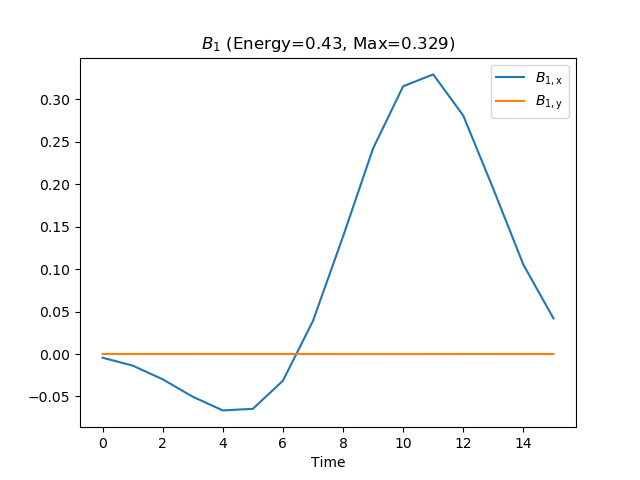

<IPython.core.display.Javascript object>


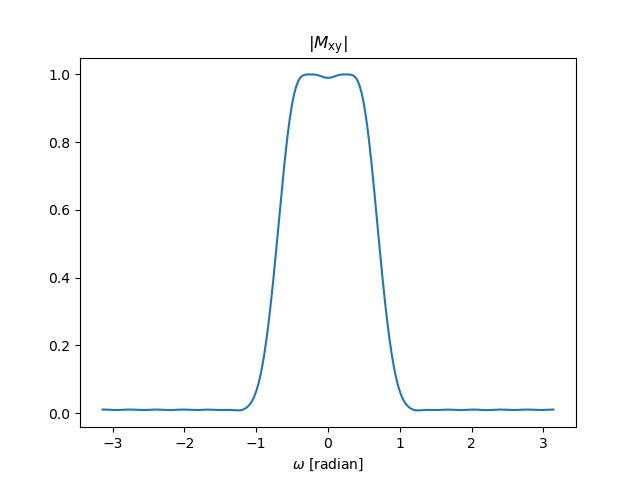

<IPython.core.display.Javascript object>


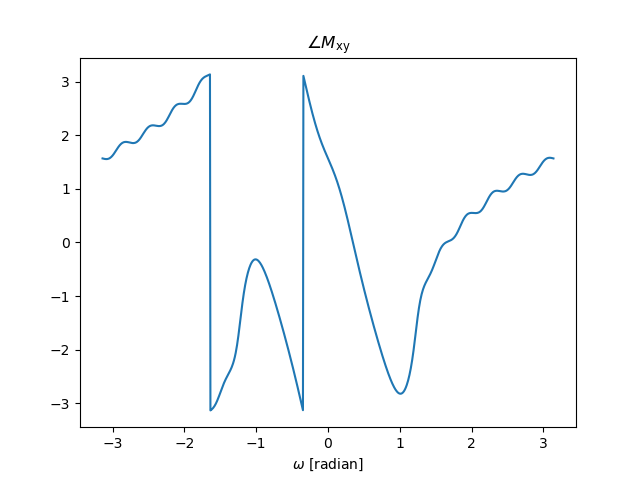

<IPython.core.display.Javascript object>


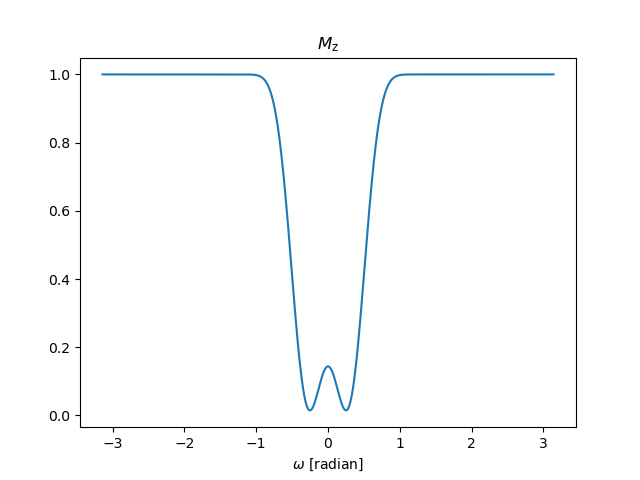

In [7]:
figs = util.plot_rf(b1)

# Spin-echo

In [10]:
n = 16
tb = 4
d1 = 0.01
d2 = 0.01

dinf = rf.dinf(d1, d2)
w = dinf / tb
bands = [[-np.pi, - (1 + w) * tb / n * np.pi],
        [-(1 - w) * tb / n * np.pi, (1 - w) * tb / n * np.pi],
        [(1 + w) * tb / n * np.pi, np.pi]]

beta = [0, lambda omega: np.exp(-1j * omega * n / 2), 0]
d_beta = [d2**0.5, d1 / 4, d2**0.5]

a, b = islr_cvxpy.design_paulynomials(n, bands, beta=beta, d_beta=d_beta, verbose=True)
b1 = rf.ab2rf(a[::-1], b[::-1])



Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 4900            
  Cones                  : 120             
  Scalar variables       : 2658            
  Matrix variables       : 1               
  Integer variables      : 0               

Optimizer started.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 4900            
  Cones                  : 120             
  Scalar variables       : 2658            
  Matrix variables       : 1               
  Integer variables      : 0               

Optimizer  - threads                : 32              
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 4642
Optimizer  - Cones                  : 121
Optimizer  - Scalar variab

<IPython.core.display.Javascript object>


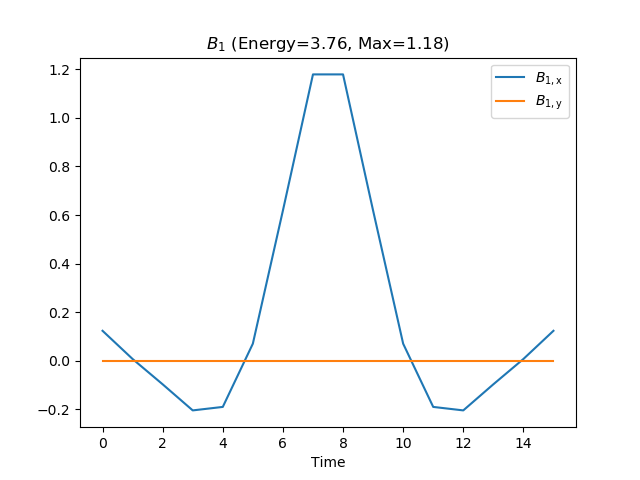

<IPython.core.display.Javascript object>


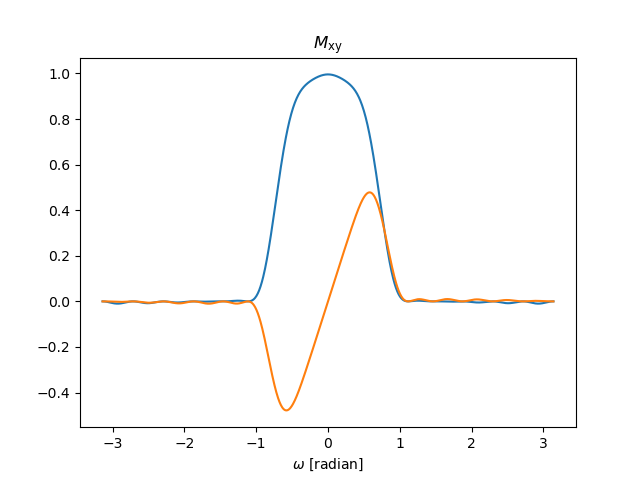

In [9]:
figs = util.plot_rf(b1, spin_echo=True)